In [31]:
# Импортируем нужные модули и вк

from urllib.request import urlretrieve
import vk, os, time, math
import matplotlib.pyplot as plt

# Авторизация

#login = ''
#password = ''
#vk_id = ''

#session = vk.AuthSession(app_id=vk_id, user_login=login, user_password=password) 
#vkapi = vk.API(session, v='5.81')

#session = vk.Session()
vkapi = vk.API(access_token='', v='5.131')


In [4]:
# Загрузка фото с альбомов
url = "https://vk.com/album-132_47581240"
# Разбираем ссылку
# album_id = url.split('/')[-1].split('_')[1]
owner_id = url.split('/')[-1].split('_')[0].replace('album', '')

albums = vkapi.photos.getAlbums(owner_id=owner_id)
photos_count = albums["items"][0]["size"]

counter = 0 # текущий счетчик
prog = 0 # процент загруженных
breaked = 0 # не загружено из-за ошибки
time_now = time.time() # время старта

#&nbsp;Создадим каталоги
if not os.path.exists('saved'):
    os.mkdir('saved')
for album in albums['items']:
    photo_folder = 'saved/album{0}_{1}'.format(owner_id, album["id"])
    if not os.path.exists(photo_folder):
        os.mkdir(photo_folder)
    photos_count = album['size']

    counter = 0 # текущий счетчик
    prog = 0 # процент загруженных
    breaked = 0 # не загружено из-за ошибки

    for j in range(math.ceil(photos_count / 1000)): # Подсчитаем&nbsp;сколько раз нужно получать список фото, так как число получится не целое - округляем в большую сторону
        photos = vkapi.photos.get(owner_id=owner_id, album_id=album["id"], count=1000, offset=j*1000) #&nbsp;Получаем список фото
        for photo in photos["items"]:
            counter += 1
            url = photo["sizes"][-1]["url"] # Получаем адрес изображения
            print('Загружаю фото № {} из {}. Прогресс: {} %'.format(counter, photos_count, prog))
            prog = round(100/photos_count*counter,2)
            try:
                urlretrieve(url, photo_folder + "/" + os.path.split(url)[1].split('?')[0]) # Загружаем и сохраняем файл
            except Exception:
                print('Произошла ошибка, файл пропущен.')
                breaked += 1
                continue

time_for_dw = time.time() - time_now
print("\nВ очереди было {} файлов. Из них удачно загружено {} файлов, {} не удалось загрузить. Затрачено времени: {} сек.". format(photos_count, photos_count-breaked, breaked, round(time_for_dw,1)))

Загружаю фото № 1 из 1. Прогресс: 0 %
Загружаю фото № 1 из 13. Прогресс: 0 %
Загружаю фото № 2 из 13. Прогресс: 7.69 %
Загружаю фото № 3 из 13. Прогресс: 15.38 %
Загружаю фото № 4 из 13. Прогресс: 23.08 %
Загружаю фото № 5 из 13. Прогресс: 30.77 %
Загружаю фото № 6 из 13. Прогресс: 38.46 %
Загружаю фото № 7 из 13. Прогресс: 46.15 %
Загружаю фото № 8 из 13. Прогресс: 53.85 %
Загружаю фото № 9 из 13. Прогресс: 61.54 %
Загружаю фото № 10 из 13. Прогресс: 69.23 %
Загружаю фото № 11 из 13. Прогресс: 76.92 %
Загружаю фото № 12 из 13. Прогресс: 84.62 %
Загружаю фото № 13 из 13. Прогресс: 92.31 %
Загружаю фото № 1 из 50. Прогресс: 0 %
Загружаю фото № 2 из 50. Прогресс: 2.0 %
Загружаю фото № 3 из 50. Прогресс: 4.0 %
Загружаю фото № 4 из 50. Прогресс: 6.0 %
Загружаю фото № 5 из 50. Прогресс: 8.0 %
Загружаю фото № 6 из 50. Прогресс: 10.0 %
Загружаю фото № 7 из 50. Прогресс: 12.0 %
Загружаю фото № 8 из 50. Прогресс: 14.0 %
Загружаю фото № 9 из 50. Прогресс: 16.0 %
Загружаю фото № 10 из 50. Прогрес

sci (https://vk.com/sci):
27.8% участников женского пола
72.2% участников мужского пола
Топ 3 города: [('Москва', 82), ('Санкт-Петербург', 12), ('Новосибирск', 8)]
Средний возраст: 33.0

science_technology (https://vk.com/science_technology):
15.4% участников женского пола
84.6% участников мужского пола
Топ 3 города: [('Москва', 36), ('Санкт-Петербург', 15), ('Новосибирск', 5)]
Средний возраст: 29.6

220 пользователей из 2000 (12.4%) состоят в обеих группах


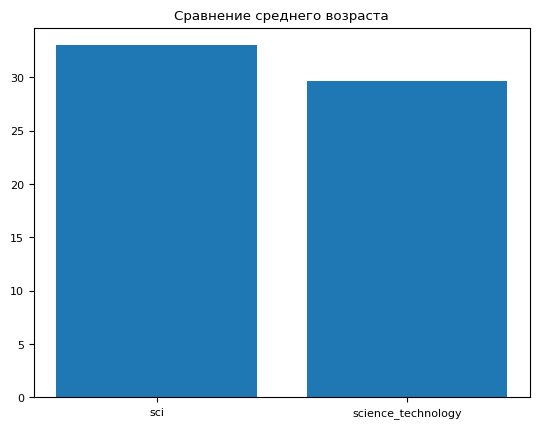

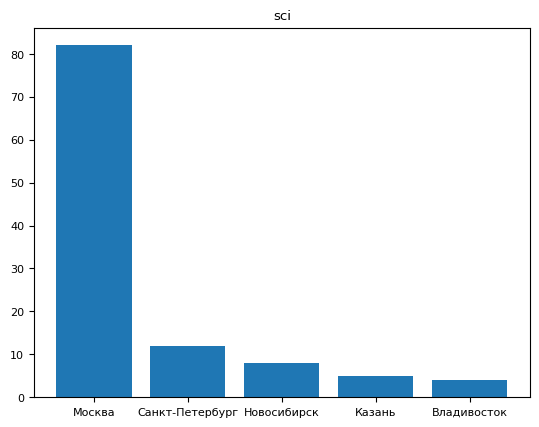

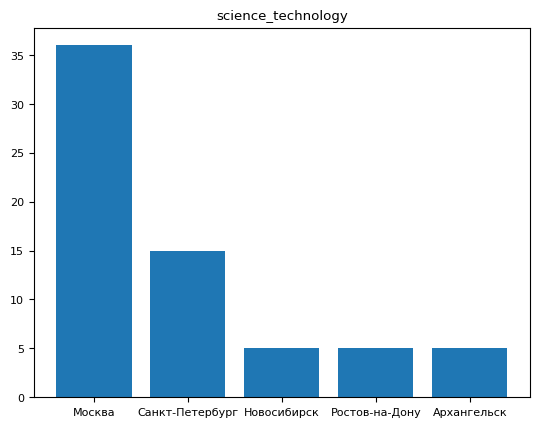

In [112]:
# группы
from collections import Counter
from datetime import datetime
from dateutil.relativedelta import relativedelta


usersCount = 2000
group_id = 'sci'
group_id2 = 'science_technology'
users = vkapi.groups.getMembers(group_id=group_id, fields='sex,bdate,city', count=1000, offset = 0, sort='id_desc')['items'] + vkapi.groups.getMembers(group_id=group_id, fields='sex,bdate,city', count=1000, offset = 1000, sort='id_desc')['items']

sex = [i['sex'] for i in users]
bdate = list(filter(lambda x: x is not None, [i['bdate'] if 'bdate' in i and len(i['bdate'].split('.')) == 3 else None for i in users]))
ages = [relativedelta(datetime.now(), datetime.strptime(i, '%d.%m.%Y')).years for i in bdate]
city_rate = Counter(list(filter(lambda x: x is not None, [i['city']['title'] if 'city' in i else None for i in users])))
female_count = sex.count(1)
male_count = len(sex) - female_count

users2 = vkapi.groups.getMembers(group_id=group_id2, fields='sex,bdate,city', count=1000, offset = 0, sort='id_desc')['items'] + vkapi.groups.getMembers(group_id=group_id2, fields='sex,bdate,city', count=1000, offset = 1000, sort='id_desc')['items']

sex2 = [i['sex'] for i in users2]
bdate2 = list(filter(lambda x: x is not None, [i['bdate'] if 'bdate' in i and len(i['bdate'].split('.')) == 3 else None for i in users2]))
ages2 = [relativedelta(datetime.now(), datetime.strptime(i, '%d.%m.%Y')).years for i in bdate2]
city_rate2 = Counter(list(filter(lambda x: x is not None, [i['city']['title'] if 'city' in i else None for i in users2])))
female_count2 = sex2.count(1)
male_count2 = len(sex2) - female_count2


print(f'{group_id} (https://vk.com/{group_id}):')
print(f'{(female_count / (female_count + male_count) * 100):.1f}% участников женского пола')
print(f'{(male_count / (female_count + male_count) * 100):.1f}% участников мужского пола')
print(f'Топ 3 города: {city_rate.most_common(3)}')
print(f'Средний возраст: {(sum(ages) / len(ages)):.1f}')

print(f'\n{group_id2} (https://vk.com/{group_id2}):')
print(f'{(female_count2 / (female_count2 + male_count2) * 100):.1f}% участников женского пола')
print(f'{(male_count2 / (female_count2 + male_count2) * 100):.1f}% участников мужского пола')
print(f'Топ 3 города: {city_rate2.most_common(3)}')
print(f'Средний возраст: {(sum(ages2) / len(ages2)):.1f}')
#print('\n')

group_1_ids = [i['id'] for i in users]
group_2_ids = [i['id'] for i in users2]
intersection = set(group_1_ids).intersection(set(group_2_ids))
print(f'\n{len(intersection)} пользователей из {usersCount} ({(len(intersection) / len(group_1_ids) * 100):.1f}%) состоят в обеих группах')

#ax =  plt.figure(figsize = (10, 5))
plt.title('Сравнение среднего возраста')
plt.bar([group_id, group_id2], [sum(ages) / len(ages), sum(ages2) / len(ages2)])
plt.show()

plt.title(group_id)
plt.rcParams.update({'font.size': 8})
plt.bar(Counter(dict(city_rate.most_common(5))).keys(),Counter(dict(city_rate.most_common(5))).values())
plt.show()

plt.title(group_id2)
plt.rcParams.update({'font.size': 8})
plt.bar(Counter(dict(city_rate2.most_common(5))).keys(),Counter(dict(city_rate2.most_common(5))).values())
plt.show()

sci
science_technology
dobriememes
vikiperm
permactive


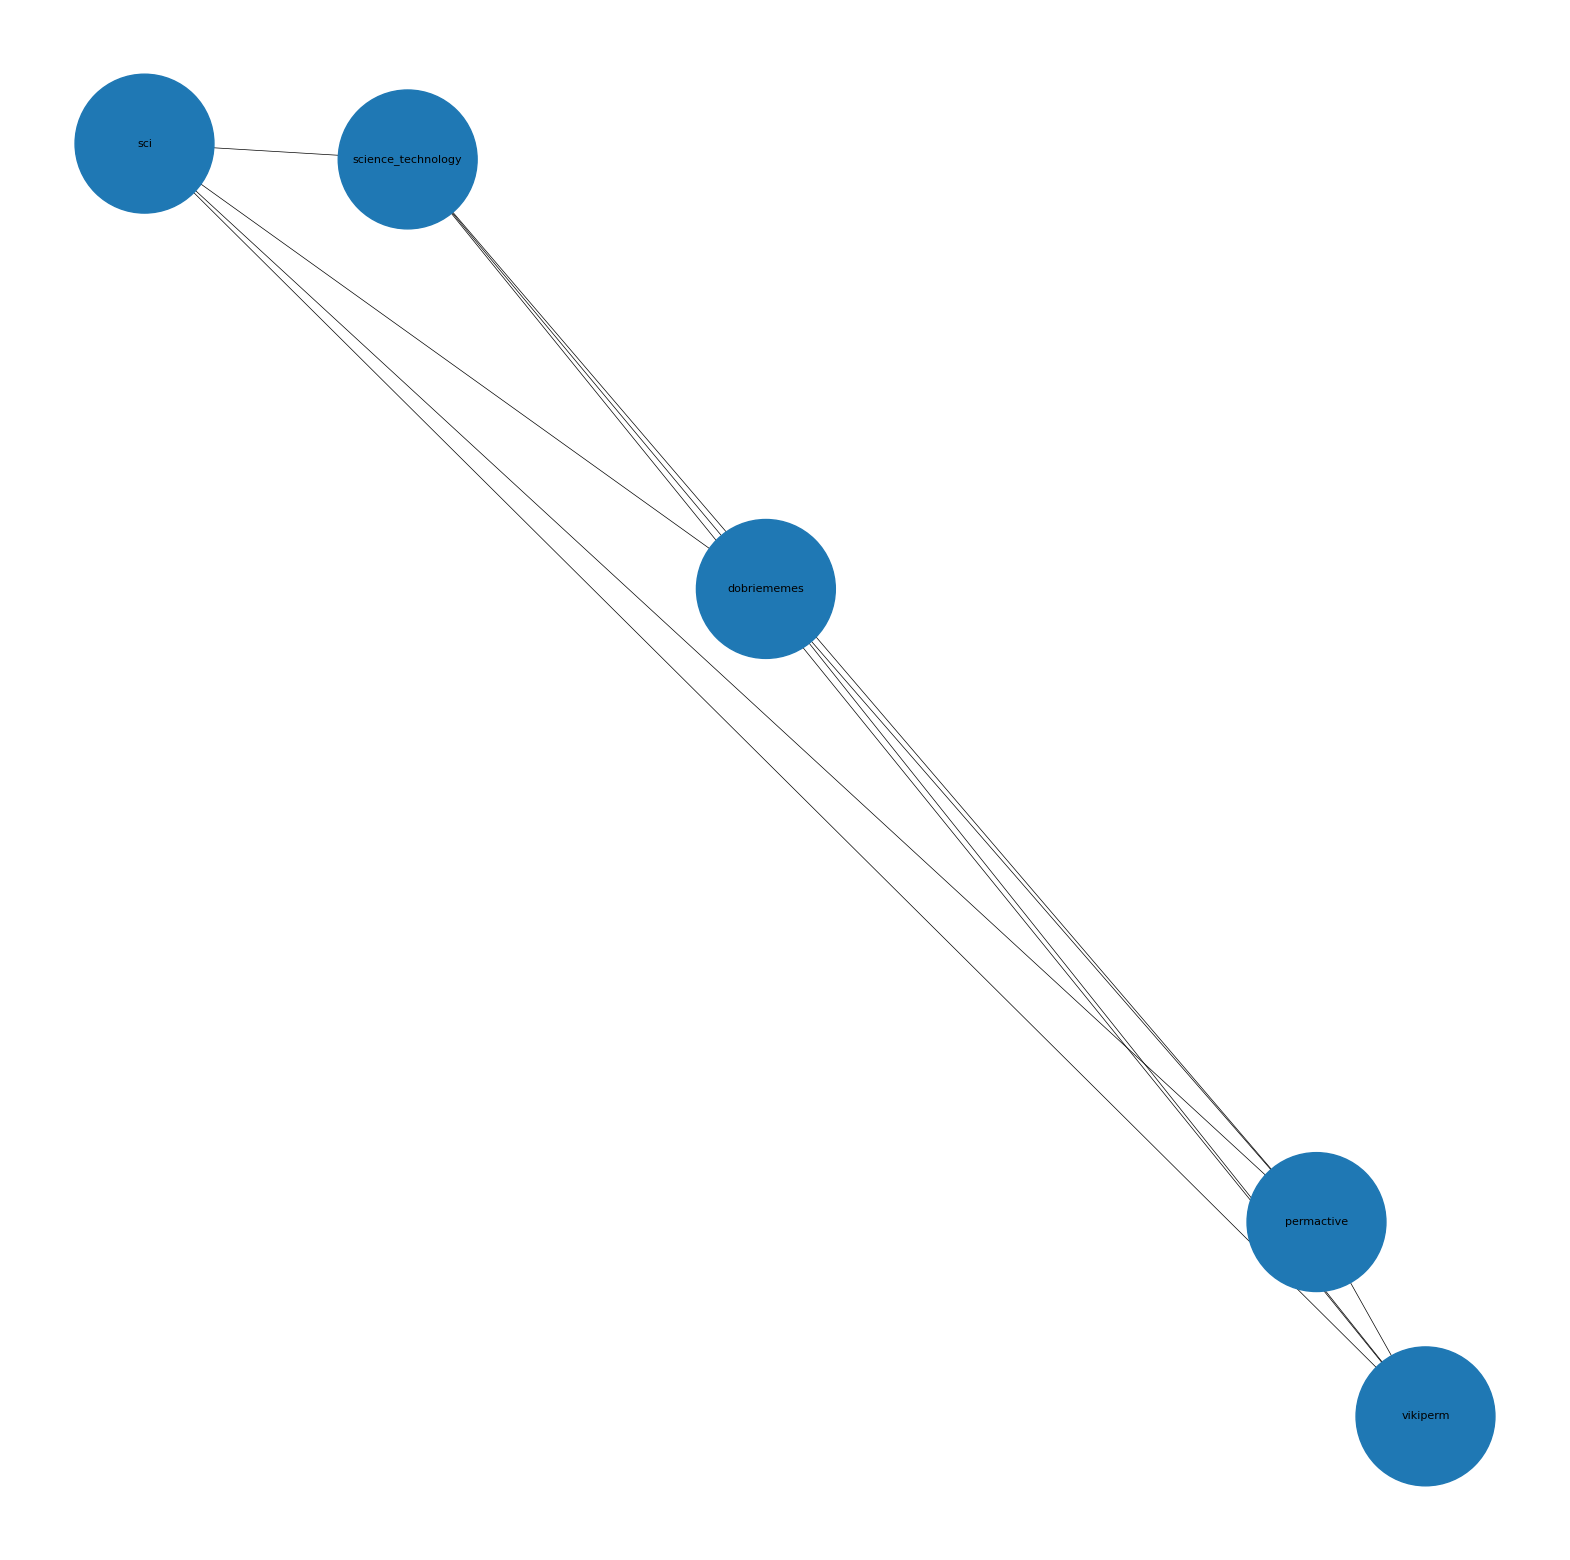

In [98]:
# график пересечений групп

import networkx
import requests

# С 2 группами и меньше будет ошибка и просто неиформативно
groups = ['http://vk.com/sci',
'http://vk.com/science_technology',
'http://vk.com/dobriememes',
'http://vk.com/vikiperm',
'http://vk.com/permactive'

]

members = {}
for g in groups:
    name = g.split('http://vk.com/')[1]
    print(name)
    set_members_id = set()
    set_members_id = set_members_id.union(vkapi.groups.getMembers(group_id=name, count=1000, offset = 0)['items'])
    members[name] = set_members_id
    time.sleep(0.33)
    
matrix = {}
for i in members:
    for j in members:
        if i != j:
            matrix[i+j] = len(members[i] & members[j]) * 1.0/ min(len(members[i]), len(members[j]))

max_matrix = max(matrix.values())
min_matrix = min(matrix.values())

for i in matrix:
    matrix[i] = (matrix[i] - min_matrix) / (max_matrix - min_matrix)
    
g = networkx.Graph(directed=False)
for i in members:
    for j in members:
        if i != j:
            g.add_edge(i, j, weight=matrix[i+j])
            
members_count = {x:len(members[x]) for x in members}

max_value = max(members_count.values()) * 1.0
size = []
max_size = 900
min_size = 100
for node in g.nodes():
    size.append(((members_count[node]/max_value)*max_size + min_size)*10)
    
pos=networkx.spring_layout(g)
plt.figure(figsize=(20,20))
networkx.draw_networkx(g, pos, node_size=size, width=0.5, font_size=8)
plt.axis('off')
plt.show()